In [1]:
from mcl import *

In [2]:
class GlobalMcl(Mcl):
    def __init__(self,
                         env_map,
                         num, motion_noise_stds={'nn':0.19, 'no': 0.001, 'on': 0.13, 'oo': 0.2},
                         distance_dev_rate=0.14,
                         direction_dev=0.05):
        super().__init__(env_map, np.array([0, 0, 0]).T, num, motion_noise_stds, distance_dev_rate, direction_dev)
        for p in self.particles:
            p.pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T

<IPython.core.display.Javascript object>


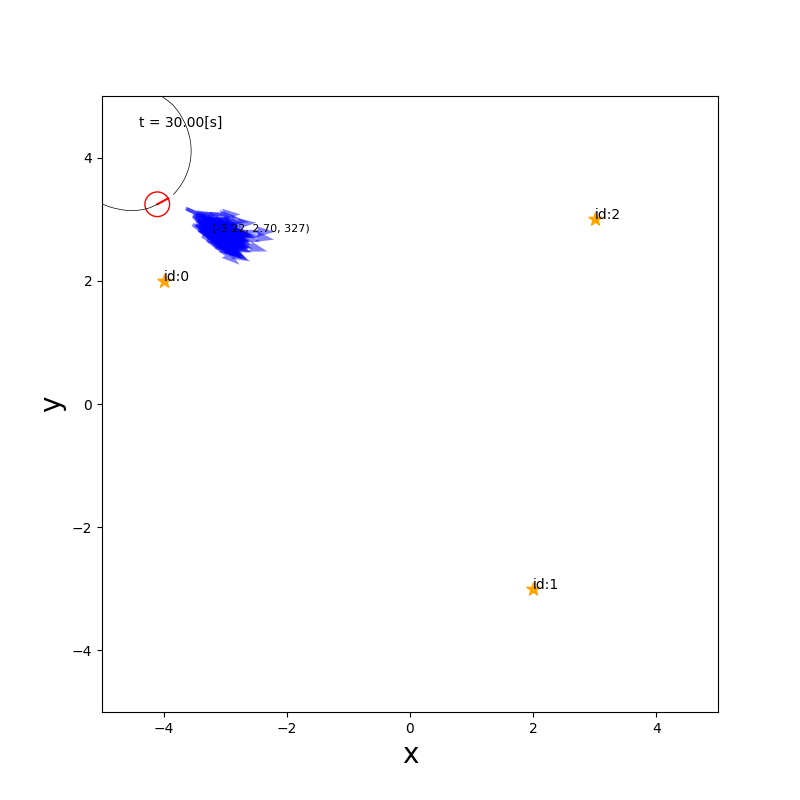

In [4]:
def trial():
    time_interval = 0.1
    world = World(30, time_interval, debug=False)
    
    m = Map()
    for lm in [(-4, 2), (2, -3), (3, 3)]:
        m.append_landmark(Landmark(*lm))
    world.append(m)
    
    init_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
    pf = GlobalMcl(m, 100)
    a = EstimationAgent(time_interval, 0.2, 10.0 / 180 * math.pi, pf)
    r = Robot(init_pose, sensor=Camera(m), agent=a, color='red')
    world.append(r)
    
    world.draw()
    
trial()